In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## ヒストグラム

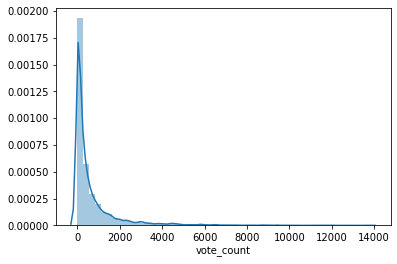

In [3]:
# csvファイルの読み込み
df = pd.read_csv('tmdb_5000_movies.csv')
sns.distplot(df['vote_count'])

## 散布図

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')

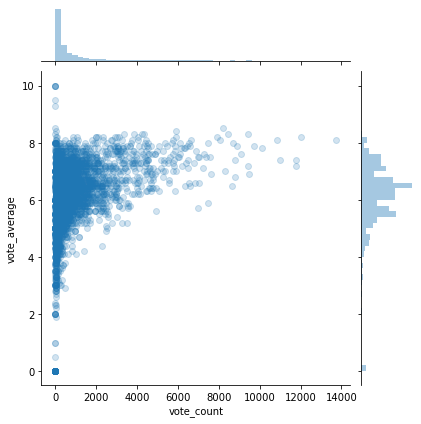

In [5]:
sns.jointplot(x='vote_count', y='vote_average', data=df, alpha=0.2)

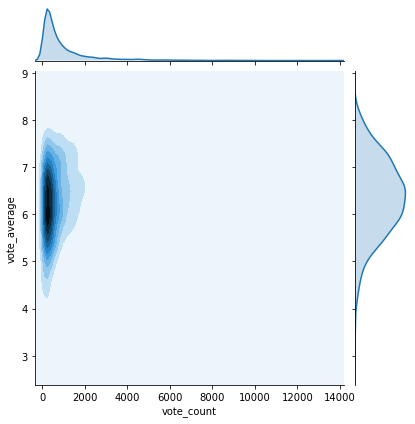

In [10]:
df = df[df['vote_count'] > 100]
sns.jointplot(x='vote_count', y='vote_average', data=df, kind='kde')

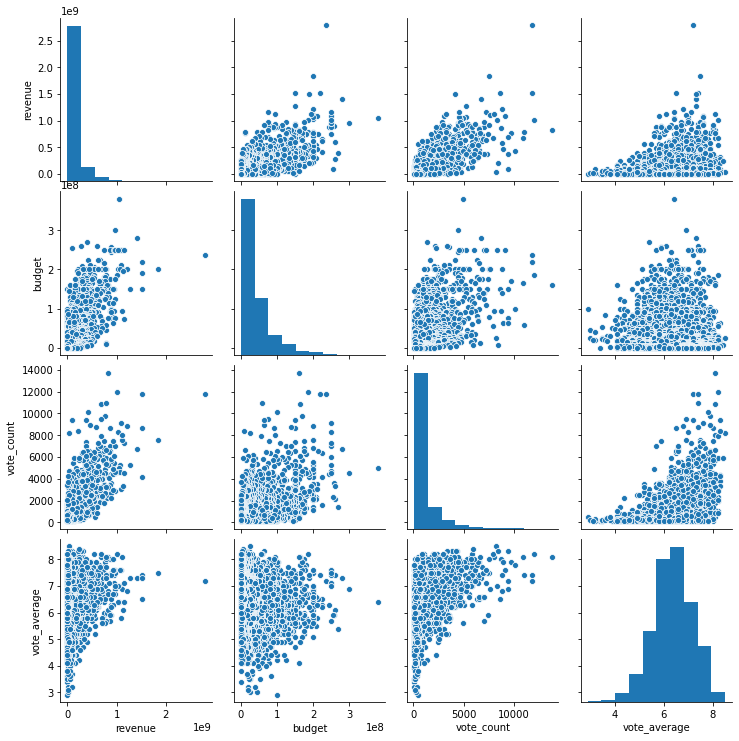

In [14]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average']])

In [16]:
# vote_averageが下はlow, 上はhigh
df['evaluation'] = df['vote_average'].apply(lambda x: 'high' if x > df['vote_average'].median() else 'low')

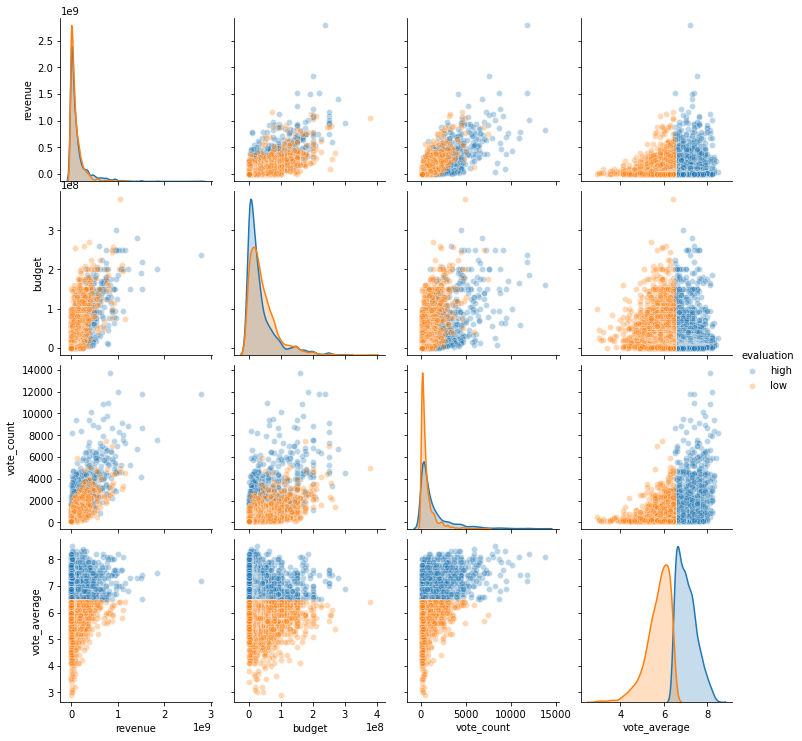

In [19]:
sns.pairplot(df[['revenue', 'budget', 'vote_count', 'vote_average', 'evaluation']],
             hue='evaluation',
             plot_kws={'alpha': 0.3})

## categorical plot

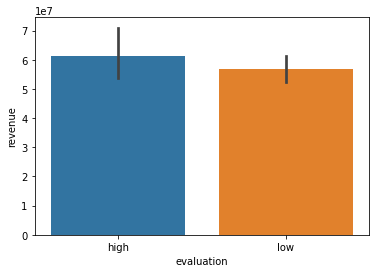

In [21]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

In [22]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

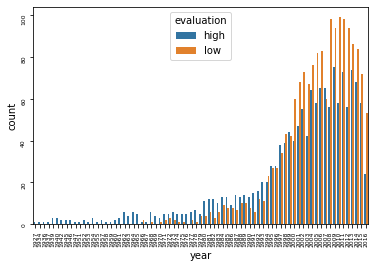

In [26]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90, labelsize=6)

In [27]:
df['decade'] = df['year'].apply(lambda x: x[:3] + '0s')

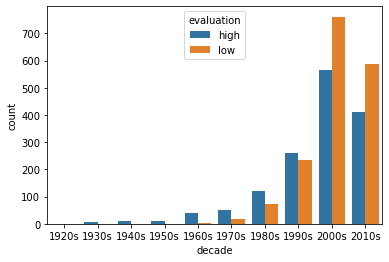

In [31]:
sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

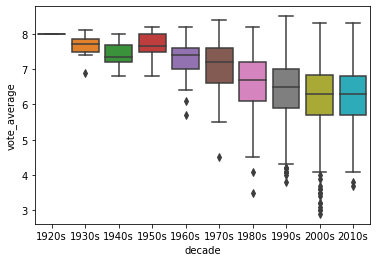

In [32]:
sns.boxplot(x='decade', y='vote_average', data=df.sort_values('decade'))

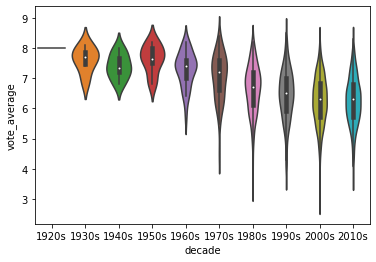

In [33]:
sns.violinplot(x='decade', y='vote_average', data=df.sort_values('decade'))

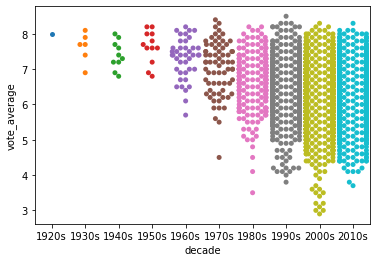

In [34]:
sns.swarmplot(x='decade', y='vote_average', data=df.sort_values('decade'))

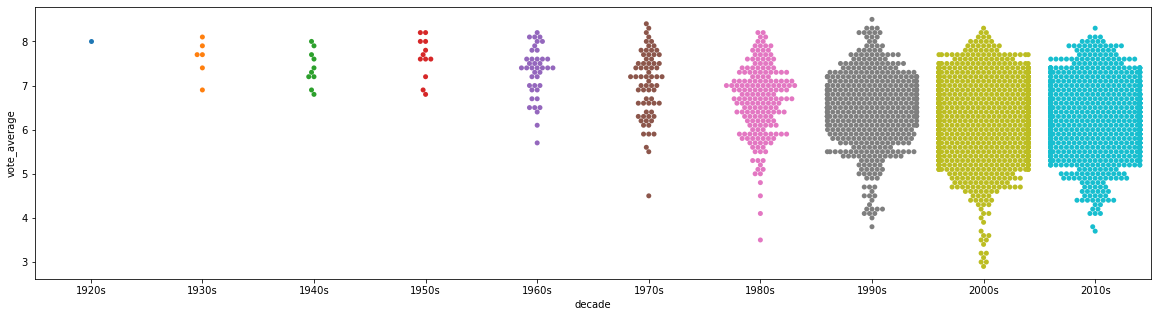

In [37]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.swarmplot(ax=ax, x='decade', y='vote_average', data=df.sort_values('decade'))

# Heatmap

In [44]:
df = pd.read_csv('tmdb_5000_movies.csv')
df = df[(df != 0).all(axis=1)]
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


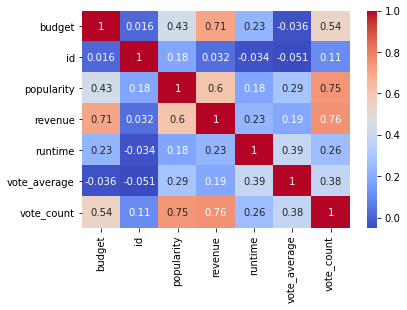

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [49]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])

In [56]:
revenue_df = df.groupby(['year', 'month']).mean()[['revenue']].pivot_table(values='revenue', index='month', columns='year')

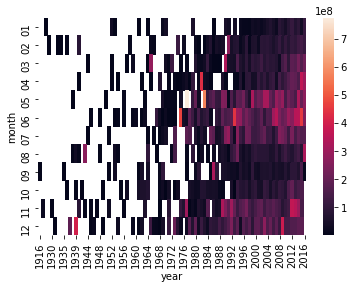

In [57]:
sns.heatmap(revenue_df)

In [68]:
import sys
sys.path

['/work',
 '/opt/anaconda3/lib/python38.zip',
 '/opt/anaconda3/lib/python3.8',
 '/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/root/.ipython']

In [70]:
import pyvenv

ModuleNotFoundError: No module named 'pyvenv'